# Import et accès à la structure de bande de phonons du matériau.

In [1]:
from pymatgen.ext.matproj import MPRester
import matplotlib.pyplot as plt
from pymatgen.phonon.plotter import * 
import numpy as np

with MPRester("FRwPcLRDMNnTniHs") as mp:
    structure = mp.get_phonon_bandstructure_by_material_id("mp-961646")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



# Vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin.

Les branches acoustiques sont les branches où la fréquence des phonons est nulle au centre de la zone de Brillouin. La vitesse de groupe est égale à $v_g = \frac{\partial \omega}{\partial q} $ où $\omega$ est la fréquence et q le vecteur d'onde. La vitesse du son est égale à la vitesse de groupe pour des vecteurs d'ondes proche de 0 (longueur d'onde 
$\lambda$ \>> paramètre de maille a). On la détermine graphiquement en calculant la valeur absolue de la pente des bandes de phonons pour des vecteurs d'ondes proche de 0. $$v_s = \sqrt{\frac{1}{cM}}$$ où c représente la compressibilité de la matère et M la masse volumique. De plus, la vitesse du son est anisotrope et dépende des directions.

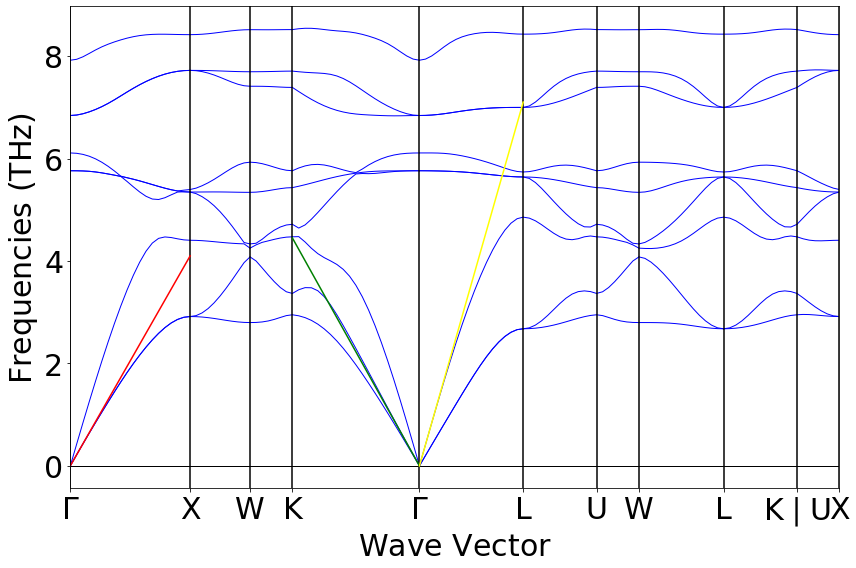

In [2]:
phonon_bands = PhononBSPlotter(structure)
data = phonon_bands.bs_plot_data()

#calcul des pentes déterminées par deux de ses points (y1-y0)/(x1-x0)
pente0 = data['frequency'][0][0][1]/data['distances'][0][1]
pente1 = -data['frequency'][3][1][-2]/(data['distances'][3][-1]-data['distances'][3][-2])
pente2 = data['frequency'][4][2][1]/(data['distances'][4][1]-data['distances'][4][0])

#plot des pentes
x1 = data['distances'][3]-data['distances'][3][-1]
x2 = data['distances'][4]-data['distances'][4][0]

droite0 = np.multiply(data['distances'][0],pente0)
droite1 = np.multiply(x1,pente1)
droite2 = np.multiply(x2,pente2)

phonon_bands.get_plot()
plt.plot(data['distances'][0],droite0, color='red')
plt.plot(data['distances'][3],droite1, color='green')
plt.plot(data['distances'][4],droite2, color='yellow')

In [7]:
# multiplication par un facteur (2*np.pi*1e2) pour avoir la vitesse en m/s
a = abs(pente0*2*np.pi*1e2)
b = abs(pente1*2*np.pi*1e2)
c = abs(pente2*2*np.pi*1e2)
print(a,b,c)

2503.838247768369 2562.7582234585934 5009.644540372434


La vitesses du son pour la direction $\Gamma$-X de la première branche acoustique vaut 2503.84m/s.\
La vitesses du son pour la direction $\Gamma$-K de la deuxième branche acoustique vaut 2562.76m/s.\
La vitesses du son pour la direction $\Gamma$-L de la troisième branche acoustique vaut 5009.64m/s.